In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings

In [2]:
supply_chain = pd.read_csv('DataCoSupplyChainDataset.csv', encoding = 'ISO-8859-1')

In [3]:
supply_chain.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [4]:
supply_chain.tail()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,Standard Class
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 1:34,Second Class
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 21:00,Standard Class
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/18/2016 20:18,Standard Class
180518,PAYMENT,4,4,168.949997,383.980011,Shipping on time,0,45,Fishing,Caguas,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 18:54,Standard Class


In [5]:
supply_chain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

## Notes about the dataset
- Customer email column is empty. It just has xxxx there. we can drop it as it's not useful
- customer password also has xxx. drop it
- customer Zipcode should be integer and not float
- order date (DateOrders) is stored as object but it's in this format '1/31/2018 22:56'. It should be converted as a datetime type. To convert it, check the msword i created for codes
- Order Item Total...why is it in float. It should be in integer. Although it was typed as a float.
- Order Zipcode should be in integer and not float
- Product Description is an empty column. We need to drop the column.
- Product image is like a webpage link. The column can be dropped as well.
- shipping date (DateOrders) should also be converted to datetime type. It shouldn't be an object.
  ## Missing Values
- Customer Lname has 8 missing values. We can fill it with the most recurring entry.
- Customer Zipcode has 3 missing values. We can fill it with the mean
- Order Zipcode has 155,679. We dro it
- Product Description remeber it's an empty column. It has 180,519 missing values. Drop it.
## Will drop many columns.

In [6]:
supply_chain.isnull().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [7]:
#to extract Month, Weekday, and Is_Weekend from shipping date (DateOrders) column before dropping all the uncessary columns.
#First convert to datetime
supply_chain['shipping date (DateOrders)'] = pd.to_datetime(supply_chain['shipping date (DateOrders)'])

In [8]:
#Then extract all the features from the column
supply_chain['Month Shipped'] = supply_chain['shipping date (DateOrders)'].dt.month
supply_chain['Weekday Shipped'] = supply_chain['shipping date (DateOrders)'].dt.weekday
supply_chain['Is_Weekend Shipped'] = supply_chain['shipping date (DateOrders)'].isin([5, 6]).astype(int)

### The reason for extracting the columns from shippind date
- Month captures seasonality
-  Weekday captures weekday vs workflow patterns
-  Is_Weekend → captures logistics slowdown effect

In [10]:
supply_chain.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,Month Shipped,Weekday Shipped,Is_Weekend Shipped
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2018-02-03 22:56:00,Standard Class,2,5,0
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2018-01-18 12:27:00,Standard Class,1,3,0
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2018-01-17 12:06:00,Standard Class,1,2,0
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2018-01-16 11:45:00,Standard Class,1,1,0
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2018-01-15 11:24:00,Standard Class,1,0,0


In [11]:
#To drop all the unnecessary columns - 22
supply_chain = supply_chain.drop(['Order Item Id','Order Customer Id','Product Card Id',
                                  'Product Category Id','Department Id','Category Id',
                                  'Product Name','Category Name','Department Name','Product Image',
                                  'Customer Fname','Customer Lname','Customer Email','Customer Password',
                                  'Customer Street','Customer City','Customer Zipcode','shipping date (DateOrders)',
                                  'Order Status','Order Profit Per Order','Sales','order date (DateOrders)', 'Order Id',
                                  'Order Item Cardprod Id', 'Order Zipcode', 'Product Description',
                                  'Delivery Status','Days for shipping (real)','Benefit per order',
                                  'Sales per customer','Order Item Profit Ratio','Customer Id'], axis = 1)

In [12]:
#Will drop Product Status and Is_Weekend Shipped cos it's just one value 0 in bothe columns
supply_chain = supply_chain.drop(['Product Status', 'Is_Weekend Shipped'], axis = 1)

In [13]:
supply_chain.columns
#After dropping the noisy columns, we have 22 columns remaining

Index(['Type', 'Days for shipment (scheduled)', 'Late_delivery_risk',
       'Customer Country', 'Customer Segment', 'Customer State', 'Latitude',
       'Longitude', 'Market', 'Order City', 'Order Country',
       'Order Item Discount', 'Order Item Discount Rate',
       'Order Item Product Price', 'Order Item Quantity', 'Order Item Total',
       'Order Region', 'Order State', 'Product Price', 'Shipping Mode',
       'Month Shipped', 'Weekday Shipped'],
      dtype='object')

In [19]:
supply_chain

,Type,Days for shipment (scheduled),Late_delivery_risk,Customer Country,Customer Segment,Customer State,Latitude,Longitude,Market,Order City,...,Order Item Discount Rate,Order Item Product Price,Order Item Quantity,Order Item Total,Order Region,Order State,Product Price,Shipping Mode,Month Shipped,Weekday Shipped
0,DEBIT,4,0,Puerto Rico,Consumer,PR,18.251453,-66.037056,Pacific Asia,Bekasi,...,0.04,327.750000,1,314.640015,Southeast Asia,Java Occidental,327.750000,Standard Class,2,5
1,TRANSFER,4,1,Puerto Rico,Consumer,PR,18.279451,-66.037064,Pacific Asia,Bikaner,...,0.05,327.750000,1,311.359985,South Asia,Rajastán,327.750000,Standard Class,1,3
2,CASH,4,0,EE. UU.,Consumer,CA,37.292233,-121.881279,Pacific Asia,Bikaner,...,0.06,327.750000,1,309.720001,South Asia,Rajastán,327.750000,Standard Class,1,2
3,DEBIT,4,0,EE. UU.,Home Office,CA,34.125946,-118.291016,Pacific Asia,Townsville,...,0.07,327.750000,1,304.809998,Oceania,Queensland,327.750000,Standard Class,1,1
4,PAYMENT,4,0,Puerto Rico,Corporate,PR,18.253769,-66.037048,Pacific Asia,Townsville,...,0.09,327.750000,1,298.250000,Oceania,Queensland,327.750000,Standard Class,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,0,EE. UU.,Home Office,NY,40.640930,-73.942711,Pacific Asia,Shanghái,...,0.00,399.980011,1,399.980011,Eastern Asia,Shanghái,399.980011,Standard Class,1,2
180515,DEBIT,2,1,EE. UU.,Corporate,CA,35.362545,-119.018700,Pacific Asia,Hirakata,...,0.01,399.980011,1,395.980011,Eastern Asia,Osaka,399.980011,Second Class,1,1
180516,TRANSFER,4,1,EE. UU.,Corporate,CT,41.629959,-72.967155,Pacific Asia,Adelaide,...,0.02,399.980011,1,391.980011,Oceania,Australia del Sur,399.980011,Standard Class,1,2
180517,PAYMENT,4,0,Puerto Rico,Consumer,PR,18.213350,-66.370575,Pacific Asia,Adelaide,...,0.03,399.980011,1,387.980011,Oceania,Australia del Sur,399.980011,Standard Class,1,0


In [14]:
#To check for null values
supply_chain.isnull().sum()

Type                             0
Days for shipment (scheduled)    0
Late_delivery_risk               0
Customer Country                 0
Customer Segment                 0
Customer State                   0
Latitude                         0
Longitude                        0
Market                           0
Order City                       0
Order Country                    0
Order Item Discount              0
Order Item Discount Rate         0
Order Item Product Price         0
Order Item Quantity              0
Order Item Total                 0
Order Region                     0
Order State                      0
Product Price                    0
Shipping Mode                    0
Month Shipped                    0
Weekday Shipped                  0
dtype: int64

In [15]:
#To check for duplicates
supply_chain.duplicated().sum()

np.int64(0)

In [16]:
#to check for datatypes
supply_chain.dtypes

Type                              object
Days for shipment (scheduled)      int64
Late_delivery_risk                 int64
Customer Country                  object
Customer Segment                  object
Customer State                    object
Latitude                         float64
Longitude                        float64
Market                            object
Order City                        object
Order Country                     object
Order Item Discount              float64
Order Item Discount Rate         float64
Order Item Product Price         float64
Order Item Quantity                int64
Order Item Total                 float64
Order Region                      object
Order State                       object
Product Price                    float64
Shipping Mode                     object
Month Shipped                      int32
Weekday Shipped                    int32
dtype: object

In [17]:
#To select the numeric variables/features in the dataset
num_features = supply_chain.select_dtypes(include=['int','float'])
#This gives us only the columns where we have just numbers
num_features.columns

Index(['Days for shipment (scheduled)', 'Late_delivery_risk', 'Latitude',
       'Longitude', 'Order Item Discount', 'Order Item Discount Rate',
       'Order Item Product Price', 'Order Item Quantity', 'Order Item Total',
       'Product Price', 'Month Shipped', 'Weekday Shipped'],
      dtype='object')

In [18]:
#To select the categorical variables/features in d dataset
cat_features = supply_chain.select_dtypes(include=['object'])
#This gives us only the columns where we have text/objects
cat_features.columns

Index(['Type', 'Customer Country', 'Customer Segment', 'Customer State',
       'Market', 'Order City', 'Order Country', 'Order Region', 'Order State',
       'Shipping Mode'],
      dtype='object')

In [20]:
#Using a for loop to do the value counts for all the categorical features.
#This is to separate each columns in the categorical features so we can check for inconsistent category values
for i in cat_features:
    print(supply_chain[i].value_counts())
    print('==============================================')

Type
DEBIT       69295
TRANSFER    49883
PAYMENT     41725
CASH        19616
Name: count, dtype: int64
Customer Country
EE. UU.        111146
Puerto Rico     69373
Name: count, dtype: int64
Customer Segment
Consumer       93504
Corporate      54789
Home Office    32226
Name: count, dtype: int64
Customer State
PR       69373
CA       29223
NY       11327
TX        9103
IL        7631
FL        5456
OH        4095
PA        3824
MI        3804
NJ        3191
AZ        3026
GA        2503
MD        2415
NC        1992
CO        1914
VA        1849
OR        1668
MA        1607
TN        1582
NV        1440
MO        1354
HI        1248
CT        1094
UT         968
NM         949
LA         948
WA         920
WI         850
MN         672
SC         665
IN         581
DC         579
KY         487
KS         458
DE         269
RI         243
WV         241
OK         232
ND         215
ID         167
AR         164
MT          87
IA          67
AL          35
95758        2
91732        1

In [21]:
#Saving the cleaned dataset

supply_chain.to_csv('Supply Chain_cleaned_final.csv', index = False)

In [22]:
#Importing the cleaned dataset
supply_chain = pd.read_csv('Supply Chain_cleaned_final.csv')

In [23]:
supply_chain

,Type,Days for shipment (scheduled),Late_delivery_risk,Customer Country,Customer Segment,Customer State,Latitude,Longitude,Market,Order City,...,Order Item Discount Rate,Order Item Product Price,Order Item Quantity,Order Item Total,Order Region,Order State,Product Price,Shipping Mode,Month Shipped,Weekday Shipped
0,DEBIT,4,0,Puerto Rico,Consumer,PR,18.251453,-66.037056,Pacific Asia,Bekasi,...,0.04,327.750000,1,314.640015,Southeast Asia,Java Occidental,327.750000,Standard Class,2,5
1,TRANSFER,4,1,Puerto Rico,Consumer,PR,18.279451,-66.037064,Pacific Asia,Bikaner,...,0.05,327.750000,1,311.359985,South Asia,Rajastán,327.750000,Standard Class,1,3
2,CASH,4,0,EE. UU.,Consumer,CA,37.292233,-121.881279,Pacific Asia,Bikaner,...,0.06,327.750000,1,309.720001,South Asia,Rajastán,327.750000,Standard Class,1,2
3,DEBIT,4,0,EE. UU.,Home Office,CA,34.125946,-118.291016,Pacific Asia,Townsville,...,0.07,327.750000,1,304.809998,Oceania,Queensland,327.750000,Standard Class,1,1
4,PAYMENT,4,0,Puerto Rico,Corporate,PR,18.253769,-66.037048,Pacific Asia,Townsville,...,0.09,327.750000,1,298.250000,Oceania,Queensland,327.750000,Standard Class,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,0,EE. UU.,Home Office,NY,40.640930,-73.942711,Pacific Asia,Shanghái,...,0.00,399.980011,1,399.980011,Eastern Asia,Shanghái,399.980011,Standard Class,1,2
180515,DEBIT,2,1,EE. UU.,Corporate,CA,35.362545,-119.018700,Pacific Asia,Hirakata,...,0.01,399.980011,1,395.980011,Eastern Asia,Osaka,399.980011,Second Class,1,1
180516,TRANSFER,4,1,EE. UU.,Corporate,CT,41.629959,-72.967155,Pacific Asia,Adelaide,...,0.02,399.980011,1,391.980011,Oceania,Australia del Sur,399.980011,Standard Class,1,2
180517,PAYMENT,4,0,Puerto Rico,Consumer,PR,18.213350,-66.370575,Pacific Asia,Adelaide,...,0.03,399.980011,1,387.980011,Oceania,Australia del Sur,399.980011,Standard Class,1,0


In [24]:
# Now we convert the categorical variables to numerical variables using LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [26]:
le = LabelEncoder()

In [27]:
for i in cat_features.columns:
     supply_chain[i] = le.fit_transform(supply_chain[i])

In [28]:
#Check for correlation
supply_chain.corr()

,Type,Days for shipment (scheduled),Late_delivery_risk,Customer Country,Customer Segment,Customer State,Latitude,Longitude,Market,Order City,...,Order Item Discount Rate,Order Item Product Price,Order Item Quantity,Order Item Total,Order Region,Order State,Product Price,Shipping Mode,Month Shipped,Weekday Shipped
Type,1.000000,0.000690,-0.061529,0.005928,-0.000613,0.002421,-0.004193,0.007722,-0.001964,-0.006535,...,-0.001474,-0.000197,0.002664,0.001359,-0.001376,-0.006733,-0.000197,0.000030,-0.005093,-0.005730
Days for shipment (scheduled),0.000690,1.000000,-0.369352,0.005005,-0.000086,0.009646,-0.005300,0.003675,-0.001913,-0.000784,...,0.000065,0.006912,-0.002925,0.006445,-0.009411,0.004274,0.006912,0.919296,-0.006171,0.003089
Late_delivery_risk,-0.061529,-0.369352,1.000000,-0.001044,0.001419,-0.001839,0.000679,-0.001915,-0.000578,0.003838,...,0.000404,-0.002175,-0.000139,-0.003791,0.006159,0.001223,-0.002175,-0.401375,0.003688,0.000733
Customer Country,0.005928,0.005005,-0.001044,1.000000,0.011621,0.596156,-0.910908,0.674742,-0.002206,0.004460,...,0.003461,-0.000698,0.002769,0.000809,0.000580,0.004149,-0.000698,0.001570,0.002026,-0.006037
Customer Segment,-0.000613,-0.000086,0.001419,0.011621,1.000000,0.000630,-0.010398,0.000722,-0.000108,-0.004163,...,0.001109,-0.002673,-0.002858,-0.005105,-0.003148,0.003946,-0.002673,-0.001634,-0.001107,0.004984
Customer State,0.002421,0.009646,-0.001839,0.596156,0.000630,1.000000,-0.462155,0.688733,-0.001895,-0.001206,...,0.000888,-0.002239,0.007166,0.002152,-0.002727,-0.001744,-0.002239,0.004772,0.005670,-0.007278
Latitude,-0.004193,-0.005300,0.000679,-0.910908,-0.010398,-0.462155,1.000000,-0.525122,0.002113,-0.005780,...,-0.003889,0.000471,-0.001853,-0.000223,-0.001599,-0.005384,0.000471,-0.001439,-0.004447,0.003789
Longitude,0.007722,0.003675,-0.001915,0.674742,0.000722,0.688733,-0.525122,1.000000,-0.004203,0.005919,...,0.000526,-0.000894,0.004467,0.001444,0.000343,0.002594,-0.000894,0.002163,0.003482,-0.010819
Market,-0.001964,-0.001913,-0.000578,-0.002206,-0.000108,-0.001895,0.002113,-0.004203,1.000000,0.057593,...,-0.000191,-0.027677,-0.002521,-0.036071,-0.075458,0.111169,-0.027677,-0.001098,-0.214835,-0.004633
Order City,-0.006535,-0.000784,0.003838,0.004460,-0.004163,-0.001206,-0.005780,0.005919,0.057593,1.000000,...,0.001015,-0.008513,0.002526,-0.007033,-0.120793,0.238994,-0.008513,0.000644,-0.074930,0.007017


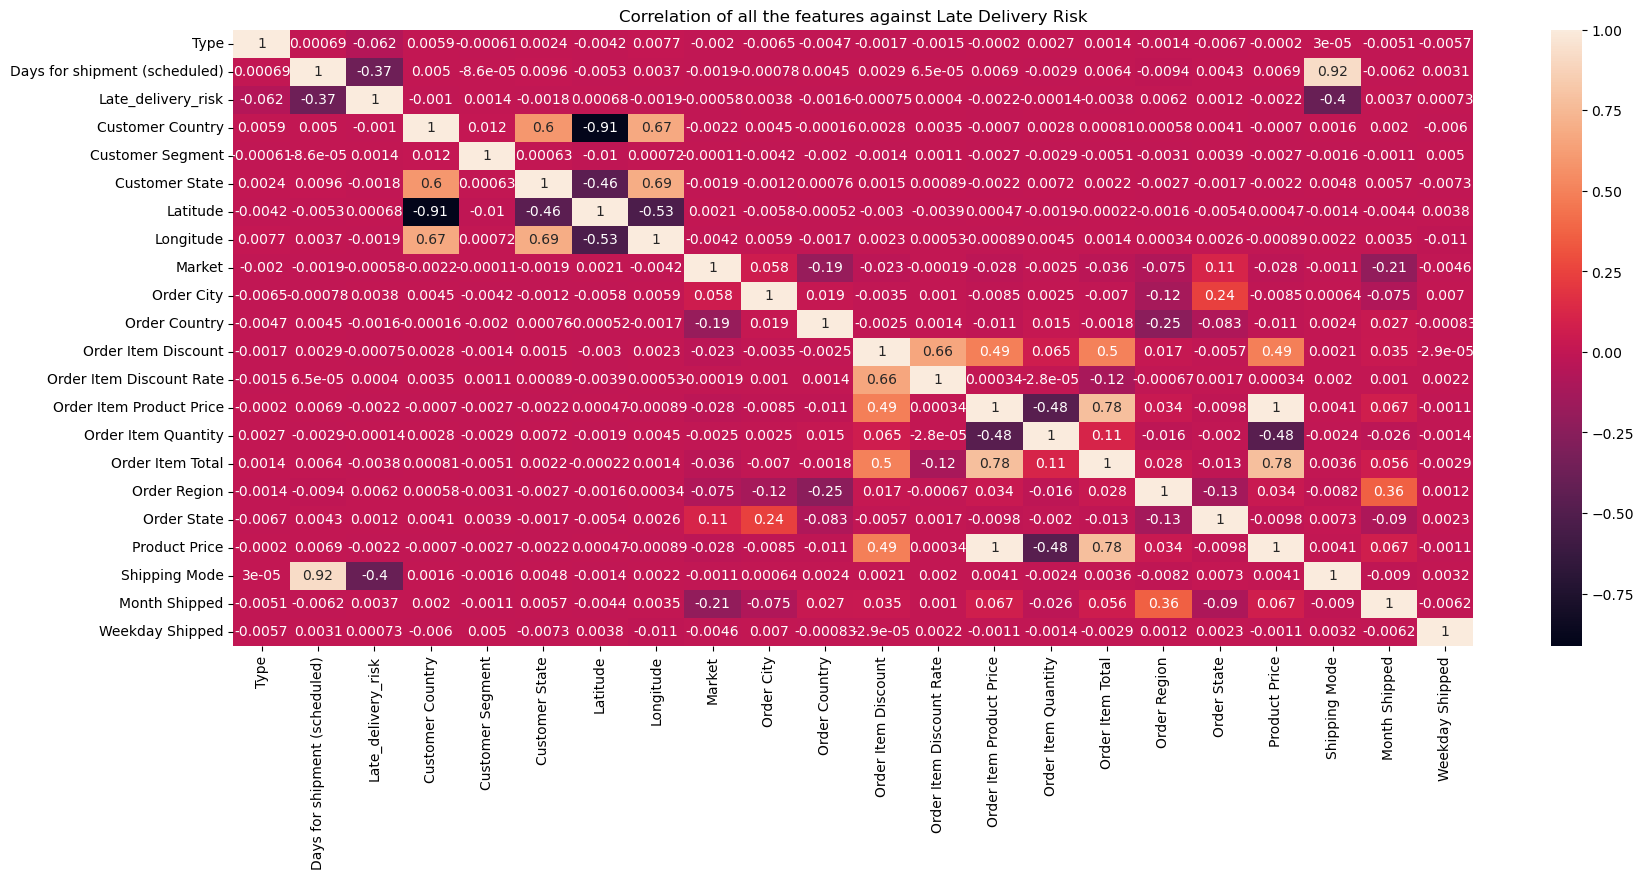

In [31]:
plt.figure(figsize=(20,8))
sb.heatmap(supply_chain.corr(), annot = True)
plt.title("Correlation of all the features against Late Delivery Risk")
plt.show()

In [32]:
#Using Kbest to select the best features for the target variable
from sklearn.feature_selection import SelectKBest, f_classif 

In [33]:
#We want to assign all the columnns in the dataset to the variable called 'features' except the target variable which is 'Late_delivery_risk' column.
features = supply_chain.drop('Late_delivery_risk', axis=1)
features 

,Type,Days for shipment (scheduled),Customer Country,Customer Segment,Customer State,Latitude,Longitude,Market,Order City,Order Country,...,Order Item Discount Rate,Order Item Product Price,Order Item Quantity,Order Item Total,Order Region,Order State,Product Price,Shipping Mode,Month Shipped,Weekday Shipped
0,1,4,1,0,36,18.251453,-66.037056,3,331,70,...,0.04,327.750000,1,314.640015,15,475,327.750000,3,2,5
1,3,4,1,0,36,18.279451,-66.037064,3,391,69,...,0.05,327.750000,1,311.359985,13,841,327.750000,3,1,3
2,0,4,0,0,5,37.292233,-121.881279,3,391,69,...,0.06,327.750000,1,309.720001,13,841,327.750000,3,1,2
3,1,4,0,2,5,34.125946,-118.291016,3,3226,8,...,0.07,327.750000,1,304.809998,11,835,327.750000,3,1,1
4,2,4,1,1,36,18.253769,-66.037048,3,3226,8,...,0.09,327.750000,1,298.250000,11,835,327.750000,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,0,4,0,2,31,40.640930,-73.942711,3,2922,31,...,0.00,399.980011,1,399.980011,7,913,399.980011,3,1,2
180515,1,2,0,1,5,35.362545,-119.018700,3,1362,77,...,0.01,399.980011,1,395.980011,7,770,399.980011,2,1,1
180516,3,4,0,1,7,41.629959,-72.967155,3,25,8,...,0.02,399.980011,1,391.980011,11,88,399.980011,3,1,2
180517,2,4,1,0,36,18.213350,-66.370575,3,25,8,...,0.03,399.980011,1,387.980011,11,88,399.980011,3,1,0


In [34]:
target = supply_chain['Late_delivery_risk']
target

0         0
1         1
2         0
3         0
4         0
         ..
180514    0
180515    1
180516    1
180517    0
180518    0
Name: Late_delivery_risk, Length: 180519, dtype: int64

In [35]:
#Asking SelectKBest to give me the best 3 features
kbest = SelectKBest(score_func = f_classif, k=3)

In [36]:
kbest.fit_transform(features, target)

array([[1., 4., 3.],
       [3., 4., 3.],
       [0., 4., 3.],
       ...,
       [3., 4., 3.],
       [2., 4., 3.],
       [2., 4., 3.]])

In [37]:
#To bring back selected names

index = kbest.get_support(indices = True) #This will give the index of the columns
index

array([ 0,  1, 18])

In [38]:
names = features.columns[index]
names #To give the names of the columns instead of just the index

Index(['Type', 'Days for shipment (scheduled)', 'Shipping Mode'], dtype='object')

In [39]:
#The features selected will be 'Customer Country','Days for shipment (scheduled)', 'Shipping Mode'
#Next is to train the algorithm using the above features 
x = supply_chain[['Customer Country','Days for shipment (scheduled)','Shipping Mode','Month Shipped',
                  'Weekday Shipped','Customer Segment','Order Region','Order Item Quantity']]
y = supply_chain['Late_delivery_risk']

In [40]:
#To split into test and train
from sklearn.model_selection import train_test_split

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=0)

## Algorithms that will be Used to create a model to predict if the delivery will be late or not are
- 1) Logistic Regression Algorithm
  2) Random Forest Classifier
  3) Decision Tree Classifier
### We're using the above because it's a Binary Classification Problem so we chose classification algorithms, not regression.
- Linear and Polynomial Regression were not used in this study because they are designed for predicting continuous numerical values like the 'how much?' question

### 1) Using the Logistic Regression Algorithm

In [42]:
#Importing the Logistics Regression Algorithm
from sklearn.linear_model import LogisticRegression

In [43]:
lr_model = LogisticRegression().fit(x_train, y_train)

In [44]:
lr_pred = lr_model.predict(x_test)

In [45]:
x_test

,Customer Country,Days for shipment (scheduled),Shipping Mode,Month Shipped,Weekday Shipped,Customer Segment,Order Region,Order Item Quantity
25475,0,1,0,2,1,1,3,3
55855,0,4,3,3,0,0,1,1
23103,0,4,3,8,3,1,17,1
139006,0,1,0,2,6,1,3,1
110824,0,0,1,1,5,1,1,1
...,...,...,...,...,...,...,...,...
122654,1,2,2,1,1,1,3,1
89507,0,4,3,10,0,0,8,2
148339,1,4,3,1,3,2,19,1
10423,0,4,3,10,0,1,22,5


In [46]:
lr_pred

array([1, 0, 0, ..., 0, 0, 0])

In [47]:
#Import the accuracy metrics to check the accuracy of the model
from sklearn.metrics import accuracy_score,classification_report,precision_score,recall_score

In [48]:
acc_score_1 = accuracy_score(y_test,lr_pred)
print('Accuracy Score_1: ',acc_score_1)

Accuracy Score_1:  0.6937735430977177


In [49]:
#To work out the classification report
Report_1 = classification_report(y_test, lr_pred)
print(Report_1)

              precision    recall  f1-score   support

           0       0.62      0.82      0.71     16384
           1       0.80      0.59      0.68     19720

    accuracy                           0.69     36104
   macro avg       0.71      0.70      0.69     36104
weighted avg       0.72      0.69      0.69     36104



In [50]:
overall_precision_1 = precision_score(y_test, lr_pred)
overall_precision_1

0.79818281938326

In [51]:
overall_recall_1 = recall_score(y_test, lr_pred)
overall_recall_1

0.5880324543610548

### 2. Using Random Forest Classifier

In [52]:
#Importing the needed libraries
from sklearn.ensemble import RandomForestClassifier

In [53]:
#Assigning it to a variable
rfc_model = RandomForestClassifier().fit(x_train, y_train)

In [54]:
#Then make predictions
rfc_pred = rfc_model.predict(x_test)

In [55]:
rfc_pred

array([1, 0, 0, ..., 1, 0, 0])

In [56]:
#To check the accuracy score
acc_score_2 = accuracy_score(y_test, rfc_pred)
print(acc_score_2)

0.706015953910924


In [57]:
Report_2 = classification_report(y_test, rfc_pred)
print(Report_2)

              precision    recall  f1-score   support

           0       0.66      0.72      0.69     16384
           1       0.75      0.69      0.72     19720

    accuracy                           0.71     36104
   macro avg       0.71      0.71      0.71     36104
weighted avg       0.71      0.71      0.71     36104



In [58]:
overall_precision_2 = precision_score(y_test, rfc_pred)
overall_precision_2

0.7510199580990187

In [59]:
overall_recall_2 = recall_score(y_test, rfc_pred)
overall_recall_2

0.6907707910750507

### 3. Using Decision Tree Classifier

In [60]:
#importing the library
from sklearn.tree import DecisionTreeClassifier

In [61]:
#Assigning it to a variable name
dtc_model = DecisionTreeClassifier().fit(x_train, y_train)

In [62]:
dtc_pred = dtc_model.predict(x_test)

In [63]:
#To check the accuracy score for this
acc_score_3 = accuracy_score(y_test, dtc_pred)
acc_score_3

0.7069576778196321

In [64]:
Report_3 = classification_report(y_test, dtc_pred)
print(Report_3)

              precision    recall  f1-score   support

           0       0.65      0.77      0.70     16384
           1       0.77      0.66      0.71     19720

    accuracy                           0.71     36104
   macro avg       0.71      0.71      0.71     36104
weighted avg       0.72      0.71      0.71     36104



In [65]:
overall_precision_3 = precision_score(y_test, dtc_pred)
overall_precision_3

0.7714421477785698

In [66]:
overall_recall_3 = recall_score(y_test, dtc_pred)
overall_recall_3

0.6586206896551724

In [67]:
#Putting the accuracy for Logistic Regression, accuracy for Random Forrest classifier and accuracy for decision tree classifier in a table
result_table = pd.DataFrame({'Model' : ['Logistic Regression', 'Random Forest Classifier', 'Decision Tree Classifier'],
                             'Accuracy Score' : [acc_score_1, acc_score_2, acc_score_3],
                             'Precision' : [overall_precision_1, overall_precision_2, overall_precision_3],
                             'Recall' : [overall_recall_1, overall_recall_2, overall_recall_3]})
result_table

,Model,Accuracy Score,Precision,Recall
0,Logistic Regression,0.693774,0.798183,0.588032
1,Random Forest Classifier,0.706016,0.751020,0.690771
2,Decision Tree Classifier,0.706958,0.771442,0.658621


# PROJECT INTERPRETATION/Models Evaluation

Three classification algorithms were used to predict Late Delivery Risk:
- Logistic Regression
- Random Forest Classifier
- Decision Tree Classifier

The models were trained using the following features:
- 1) Customer Country
  2) Days for shipment (scheduled)
  3) Shipping Mode
  4) Month Shipped
  5) Weekday Shipped
  6) Customer Segment
  7) Order Region
  8) Order Item Quantity

# Interpretation of the Results

The Random Forest Classifier achieved the best overall performance, with:
The highest recall (69.1%)
Competitive accuracy (70.6%)
- This means the Random Forest model was the most effective at correctly identifying late deliveries, which is the most important objective for this project.

Logistic Regression recorded:
Moderate accuracy (69.4%)
High precision (79.8%)
However, it had the lowest recall (58.8%), meaning it failed to detect many late deliveries.

The Decision Tree model performed reasonably well but was still outperformed by the Random Forest in recall, making Random Forest the preferred model.

# What this mean in business:
A high recall is crucial for delivery companies because: It ensures more late deliveries are detected early.
This allows companies to:
- Notify customers in advance
- Adjust logistics plans
- Reduce customer complaints and refunds

Therefore, the Random Forest model is selected as the final predictive model because it offers the best balance between accuracy, precision, and recall

#In conclusion, the results show that while all three models achieved similar accuracy scores, the Random Forest Classifier outperformed the others in terms of recall, which is the most critical metric for late delivery prediction. With a recall of approximately 69.1%, the Random Forest model was able to correctly identify the majority of late deliveries, making it the most suitable model for this task. Logistic Regression, although precise, failed to detect a significant number of late deliveries due to its lower recall. Consequently, Random Forest was selected as the final model for predicting late delivery risk.

# Data Visualization
With our visuals, we want to anwer the following questions:
- 1) What causes late deliveries? i.e. Which shipping mode is worst
  2) Which customers are most affected? 
  3) When do late deliveries happen most?

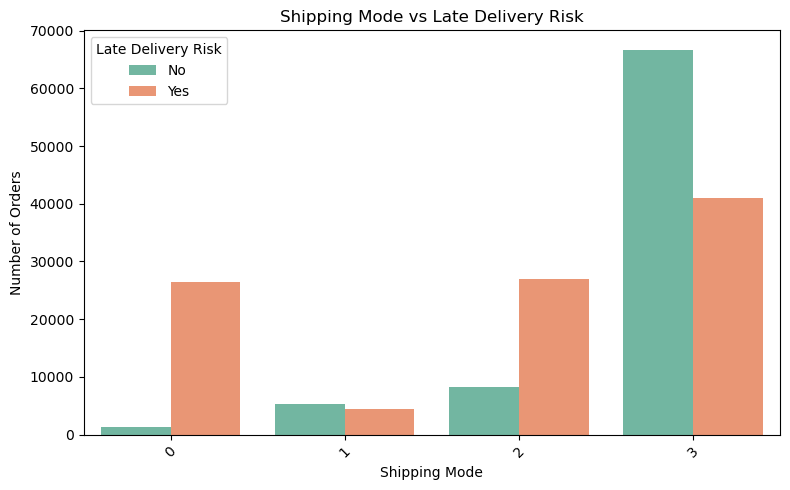

In [70]:
#1 What causes late deliveries? (Grouped Bar Chart)
#Shipping Mode Vs Late Delivery Risk
# Count late vs on-time deliveries by shipping mode
#Recall First Class - 0, Same Day - 1, Second Class - 2, Standard Class - 3

plt.figure(figsize=(8,5))
sb.countplot(data=supply_chain, x='Shipping Mode', hue='Late_delivery_risk', palette='Set2')
plt.title('Shipping Mode vs Late Delivery Risk')
plt.xlabel('Shipping Mode')
plt.ylabel('Number of Orders')
plt.legend(title='Late Delivery Risk', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 1 What causes late deliveries? 
In the above chart, we can see that 
- First Class (0) has a very high risk of late delivery which is very surprising because it sounds fast. (Worst performance)
- Same Day (1) is more reliable than First and Second Class, but delays still occur. (Moderate performance)
- Second Class (2) also has a high late delivery risk, similar to First Class. (Very high delays)
- Standard Class (3) is the most reliable shipping mode overall. Even though it has many late deliveries in absolute number, that is because it has the highest total number of orders.

### Suggestion
To reduce late deliveries, the company should rely more on Standard Class and improve logistics planning for First and Second Class deliveries, where most delays currently occur.

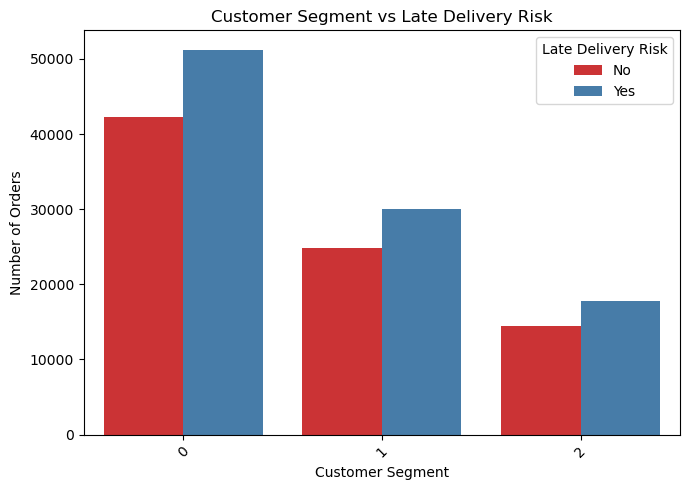

In [72]:
#Which customers are most affected? (Bar Chart)
#Consumer Segment Vs Late Delivery Risk 
#Recall Consumer - 0, Corporate - 1, Home Office - 2

# Count late deliveries by customer segment
plt.figure(figsize=(7,5))
sb.countplot(data=supply_chain, x='Customer Segment', hue='Late_delivery_risk', palette='Set1')
plt.title('Customer Segment vs Late Delivery Risk')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Orders')
plt.legend(title='Late Delivery Risk', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 2 Which customers are most affected?
From the above chart,we can see that
- Consumer customers (0) are the MOST affected by late deliveries.
- Corporate customers (1) experience fewer delivery delays than Consumers, but delays are still significant.
- Home Office (2) are the least affected by late deliveries because total orders are fewer.
### Suggestion 
Since Consumer customers experience the highest number of late deliveries, logistics improvements should prioritize this segment to improve customer satisfaction and reduce complaints.

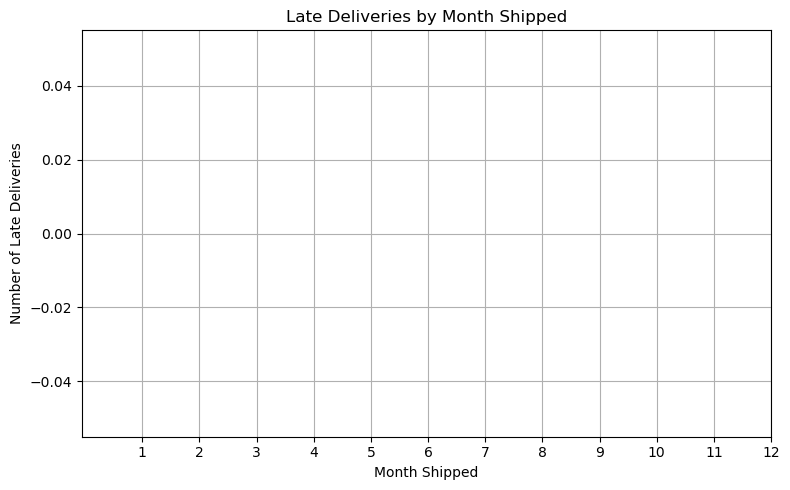

In [73]:
#When do late deliveries happen most? (Line Chart OR Bar Chart)
#Month Shipped vs Late Delivery Count
# Count of late deliveries per month

late_by_month = supply_chain[supply_chain['Late_delivery_risk']=='Yes'].groupby('Month Shipped').size()

plt.figure(figsize=(8,5))
late_by_month.plot(kind='line', marker='o', color='purple')
plt.title('Late Deliveries by Month Shipped')
plt.xlabel('Month Shipped')
plt.ylabel('Number of Late Deliveries')
plt.xticks(range(1,13))  # assuming Month Shipped is numeric 1-12
plt.grid(True)
plt.tight_layout()
plt.show()
